<a href="https://colab.research.google.com/github/hager2164/tasks_follow/blob/main/grid_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [22]:
class lfwPeopleDataset():
  def __init__(self , min_faces_per_person):
    self.faces = fetch_lfw_people(min_faces_per_person = min_faces_per_person)


  def draw_sample(self):
    fig , ax = plt.subplots(3,5, figsize=(15, 10)) # Increased figure size
    for i ,axi in enumerate (ax.flat):
      axi.imshow(self.faces.images[i] , cmap = 'bone')
      axi.set(xticks=[] , yticks =[] ,
              xlabel = self.faces.target_names[self.faces.target[i]])
    fig.tight_layout() # Adjust layout to prevent overlap
  def get_features_labels(self):
    return self.faces.data , self.faces.target , self.faces.target_names

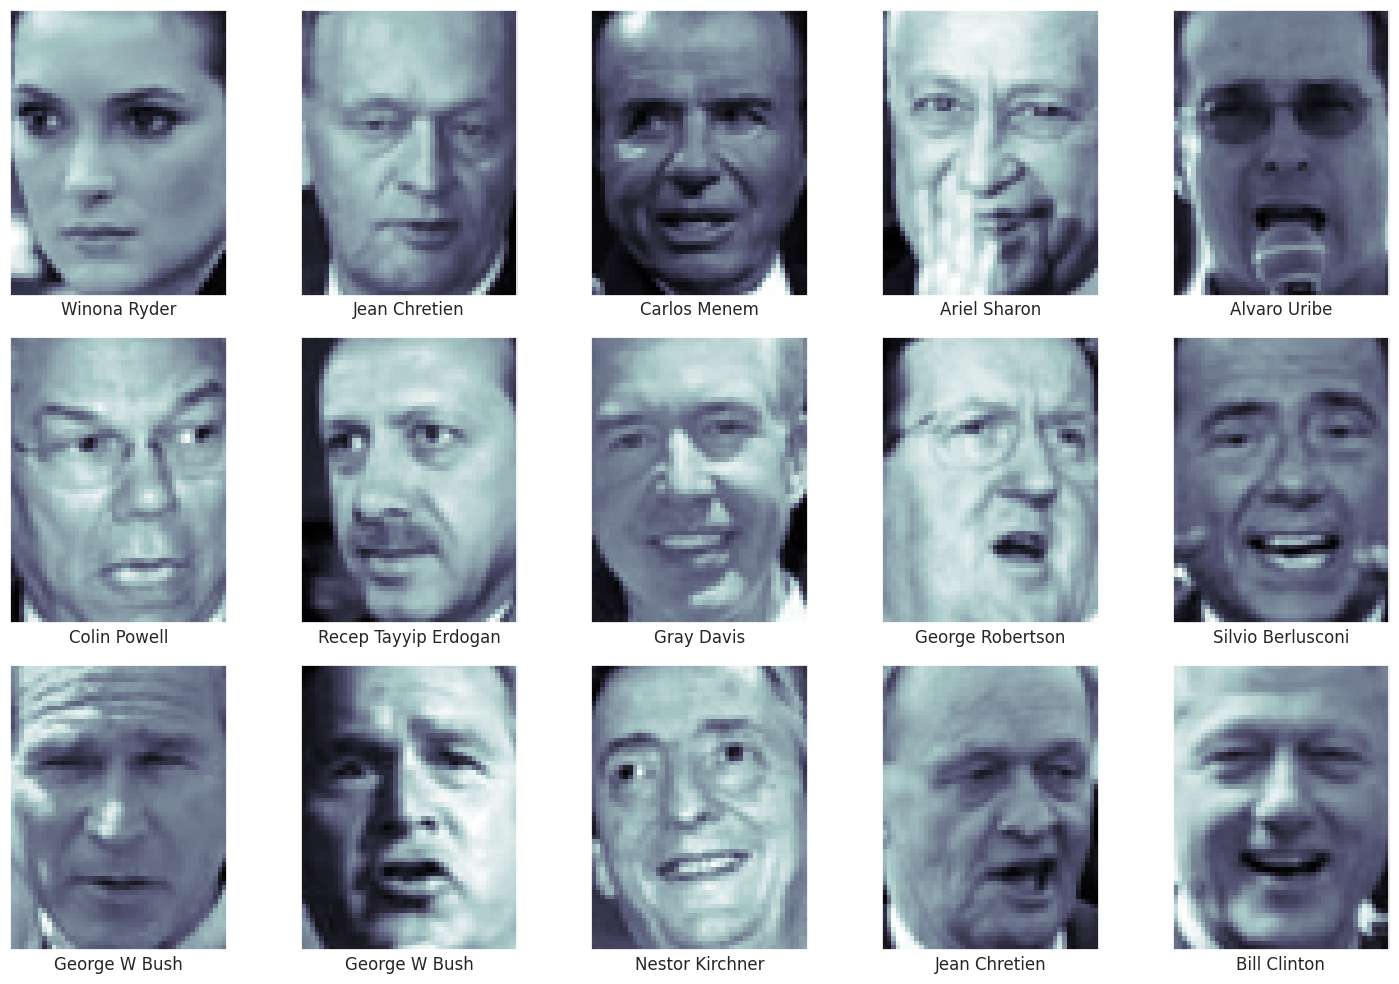

In [24]:
lfw_ds=lfwPeopleDataset(20)
lfw_ds.draw_sample()

In [5]:
features ,labels , target_names = lfw_ds.get_features_labels()
X_train , X_test , y_train , y_test = train_test_split(features , labels , random_state=42)

In [23]:
class GridSearch():
  def __init__ (self):
    pca = RandomizedPCA(n_components =150 ,whiten=True , random_state=42)
    svc =SVC(kernel = 'rbf' , class_weight = 'balanced')
    self.model =make_pipeline(pca , svc)
    param_grid ={'svc__C':[1,5,10,50] ,
                'svc__gamma' : [0.0001 ,0.0005 , 0.0001 , 0.0005]}
    self.grid = GridSearchCV(self .model , param_grid )

  def fit (self , X ,y):
    %time self.grid.fit(X,y)
    print(self.grid.best_params_)
    self.model = self . grid.best_estimator_
  def predict (self , X):
    return self.model.predict(X)
  def plot_sample(self , target_names , y_hat):
    fig, ax = plt.subplots(4, 6, figsize=(15, 10)) # Increased figure size
    for i, axi in enumerate(ax.flat):
            axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
            axi.set(xticks=[], yticks=[])
            axi.set_ylabel(target_names[y_hat[i]].split()[-1],
            color='black' if y_hat[i] == y_test[i] else 'red')
            fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
    fig.tight_layout() # Adjust layout to prevent overlap
  def report (self , target_names , y , y_hat ):
    print(classification_report(y, y_hat,
              target_names=target_names))

  def heatmap(self, target_names, y, y_hat):
        mat = confusion_matrix(y, y_hat)
        sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
        xticklabels=target_names,
        yticklabels=target_names)
        plt.xlabel('true label')
        plt.ylabel('predicted label')

In [16]:
grid = GridSearch()

In [17]:
grid.fit(X_train , y_train)

CPU times: user 6min 29s, sys: 1.73 s, total: 6min 31s
Wall time: 4min 27s
{'svc__C': 50, 'svc__gamma': 0.0005}


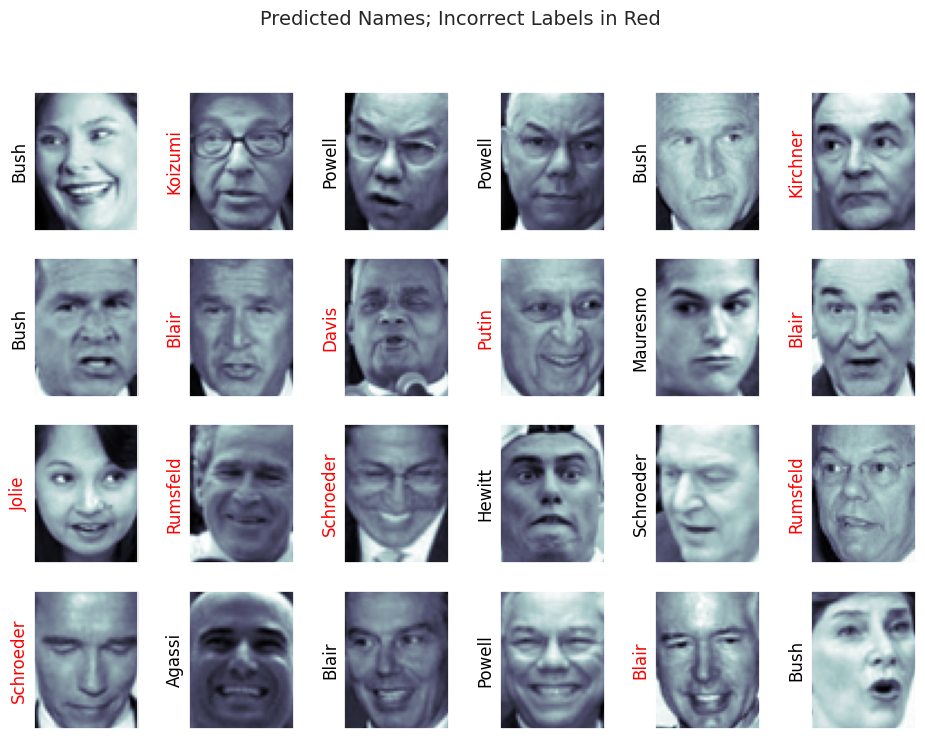

In [18]:
y_hat = grid.predict(X_test)
grid.plot_sample(target_names, y_hat)


In [19]:
grid.report(target_names, y_test, y_hat)


                           precision    recall  f1-score   support

         Alejandro Toledo       0.58      0.58      0.58        12
             Alvaro Uribe       0.57      0.44      0.50         9
          Amelie Mauresmo       0.50      0.30      0.38        10
             Andre Agassi       0.38      0.30      0.33        10
           Angelina Jolie       0.25      0.17      0.20         6
             Ariel Sharon       0.57      0.72      0.63        18
    Arnold Schwarzenegger       0.46      0.33      0.39        18
     Atal Bihari Vajpayee       0.60      0.43      0.50         7
             Bill Clinton       0.33      0.33      0.33         6
             Carlos Menem       0.60      0.60      0.60         5
             Colin Powell       0.82      0.79      0.81        71
            David Beckham       0.29      1.00      0.44         4
          Donald Rumsfeld       0.57      0.47      0.52        36
         George Robertson       0.83      1.00      0.91     

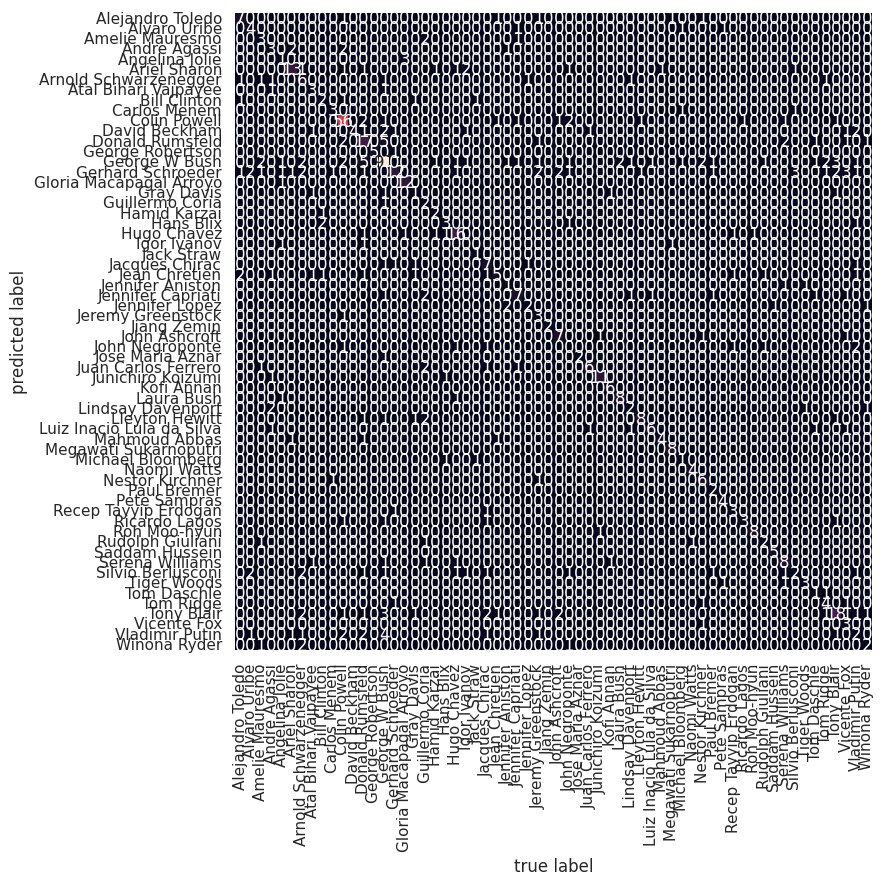

In [25]:
grid.heatmap(target_names, y_test, y_hat)